In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np

In [2]:
osw=pd.read_csv("onshore_wind_1979-2017.csv",sep=";")
pvo=pd.read_csv("pv_optimal.csv",sep=";")

In [3]:
osw["utc_time"][-365*24:(-(365-14)*24)]

333120    2017-01-01T00:00:00Z
333121    2017-01-01T01:00:00Z
333122    2017-01-01T02:00:00Z
333123    2017-01-01T03:00:00Z
333124    2017-01-01T04:00:00Z
                  ...         
333451    2017-01-14T19:00:00Z
333452    2017-01-14T20:00:00Z
333453    2017-01-14T21:00:00Z
333454    2017-01-14T22:00:00Z
333455    2017-01-14T23:00:00Z
Name: utc_time, Length: 336, dtype: object

In [4]:
print(osw["utc_time"][34010])
datetime.datetime.strptime(osw["utc_time"][34010],"%Y-%m-%dT%H:%M:%SZ")

1982-11-18T02:00:00Z


datetime.datetime(1982, 11, 18, 2, 0)

In [5]:
a=0
for oo,pp in zip(osw["utc_time"],pvo["utc_time"]):
    if(oo==pp):
        a+=1
print(a)

341880


In [6]:
ddat=[]
for oo in osw["utc_time"]:
    ddat.append(datetime.datetime.strptime(oo,"%Y-%m-%dT%H:%M:%SZ"))
ddat

[datetime.datetime(1979, 1, 1, 0, 0),
 datetime.datetime(1979, 1, 1, 1, 0),
 datetime.datetime(1979, 1, 1, 2, 0),
 datetime.datetime(1979, 1, 1, 3, 0),
 datetime.datetime(1979, 1, 1, 4, 0),
 datetime.datetime(1979, 1, 1, 5, 0),
 datetime.datetime(1979, 1, 1, 6, 0),
 datetime.datetime(1979, 1, 1, 7, 0),
 datetime.datetime(1979, 1, 1, 8, 0),
 datetime.datetime(1979, 1, 1, 9, 0),
 datetime.datetime(1979, 1, 1, 10, 0),
 datetime.datetime(1979, 1, 1, 11, 0),
 datetime.datetime(1979, 1, 1, 12, 0),
 datetime.datetime(1979, 1, 1, 13, 0),
 datetime.datetime(1979, 1, 1, 14, 0),
 datetime.datetime(1979, 1, 1, 15, 0),
 datetime.datetime(1979, 1, 1, 16, 0),
 datetime.datetime(1979, 1, 1, 17, 0),
 datetime.datetime(1979, 1, 1, 18, 0),
 datetime.datetime(1979, 1, 1, 19, 0),
 datetime.datetime(1979, 1, 1, 20, 0),
 datetime.datetime(1979, 1, 1, 21, 0),
 datetime.datetime(1979, 1, 1, 22, 0),
 datetime.datetime(1979, 1, 1, 23, 0),
 datetime.datetime(1979, 1, 2, 0, 0),
 datetime.datetime(1979, 1, 2, 1, 0)

# 1)
Dates are the same in pv and onshore  
164754 => 1997-10-17 18:00:00

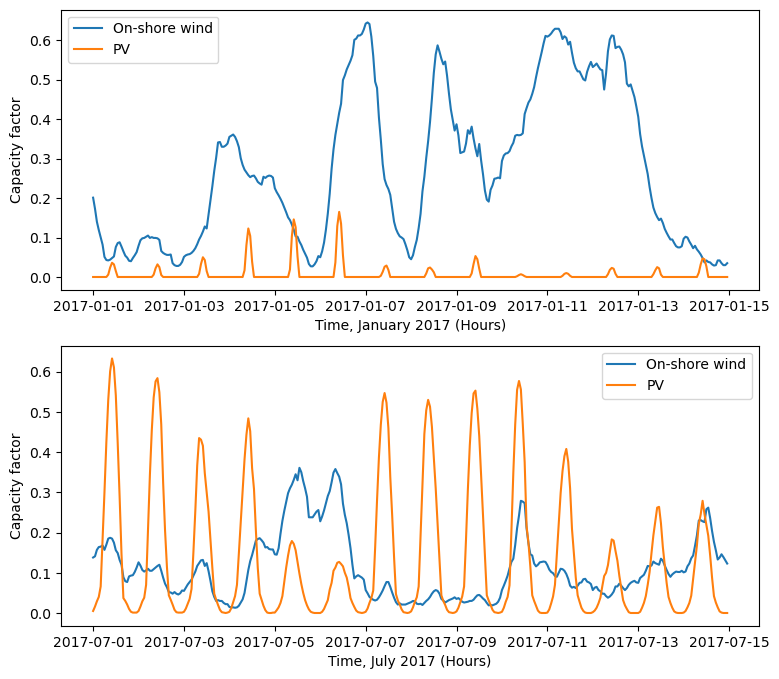

In [7]:
pf,pa=plt.subplots(2,1,figsize=(9,2*4))
sda=[365,184]
mnth=["January","July"]
for sd,a,mn in zip(sda,pa,mnth):
    a.plot(ddat[-sd*24:(-(sd-14)*24)],osw["FIN"][-sd*24:(-(sd-14)*24)],label="On-shore wind")
    a.plot(ddat[-sd*24:(-(sd-14)*24)],pvo["FIN"][-sd*24:(-(sd-14)*24)],label="PV")
    #a.scatter(ddat[-sd*24:(-(sd-14)*24)],osw["FIN"][-sd*24:(-(sd-14)*24)],s=6)
    #a.scatter(ddat[-sd*24:(-(sd-14)*24)],pvo["FIN"][-sd*24:(-(sd-14)*24)],s=6)
    a.set_xlabel("Time, "+mn+" 2017 (Hours)")
    a.set_ylabel("Capacity factor")
    a.legend()
pf.savefig("a2_1.pdf")

# 2)
Weeks defined from first day of year (sunday), last week contains only one day
Months defined using the month label

In [8]:
odm=[] #onshore day mean
pdm=[] #pv day mean
ddd=[] #date data day :P
for sd in range(-365,0):
    odm.append(np.mean(osw["FIN"][sd*24:(sd+1)*24]))
    pdm.append(np.mean(pvo["FIN"][sd*24:(sd+1)*24]))
    ddd.append(ddat[sd*24])
owm=[]
pwm=[]
ddw=[]
for sd in range(53):
    owm.append(np.mean(osw["FIN"][-365*24+7*24*sd:-365*24+7*24*(sd+1)]))
    pwm.append(np.mean(pvo["FIN"][-365*24+7*24*sd:-365*24+7*24*(sd+1)]))
    ddw.append(ddat[-365*24+7*24*sd])
omm=[]
pmm=[]
ddm=[]
for mn in range(1,13):
    ommm=[]
    pmmm=[]
    for dd,ooo,ppp in zip(ddat,osw["FIN"],pvo["FIN"]):
        if(dd.year==2017 and dd.month==mn):
            ommm.append(ooo)
            pmmm.append(ppp)
    omm.append(np.mean(ommm))
    pmm.append(np.mean(pmmm))
    ddm.append(datetime.date(2017, mn, 1))

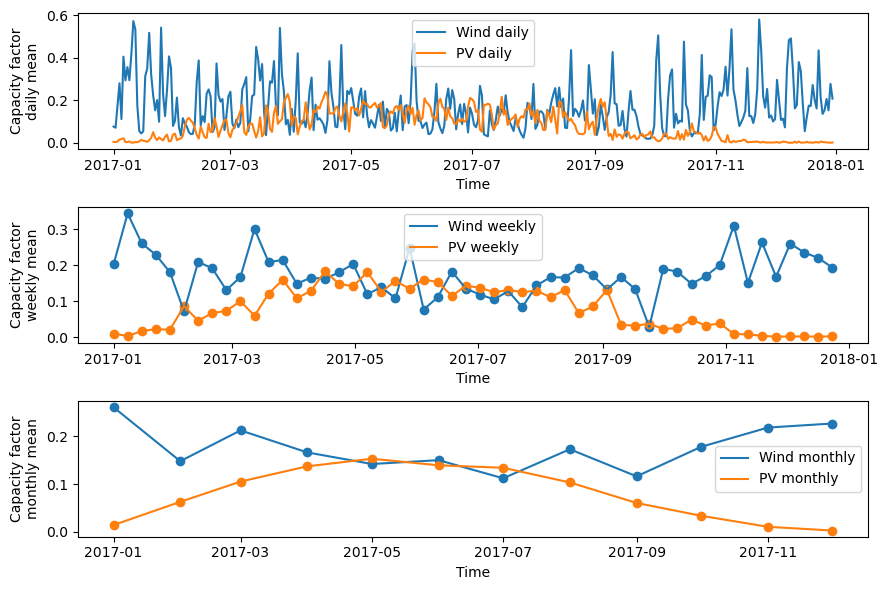

In [9]:
pf,pa=plt.subplots(3,1,figsize=(9,2*3))
d2=[[odm,pdm],[owm,pwm],[omm,pmm]]
dt2=[ddd,ddw,ddm]
mnylbl=["daily","weekly","monthly"]
mnxlbl=["Days","Weeks","Months"]
for a,mny,mnx,dt,da in zip(pa,mnylbl,mnxlbl,dt2,d2):
    a.plot(dt,da[0],label="Wind "+mny)
    a.plot(dt,da[1],label="PV "+mny)
    if(len(dt)<100):
        a.scatter(dt,da[0])
        a.scatter(dt,da[1])
    a.set_ylabel("Capacity factor\n"+mny+" mean")
    a.set_xlabel("Time")
    a.legend()
pf.tight_layout()
pf.savefig("a2_2.pdf")

# 3

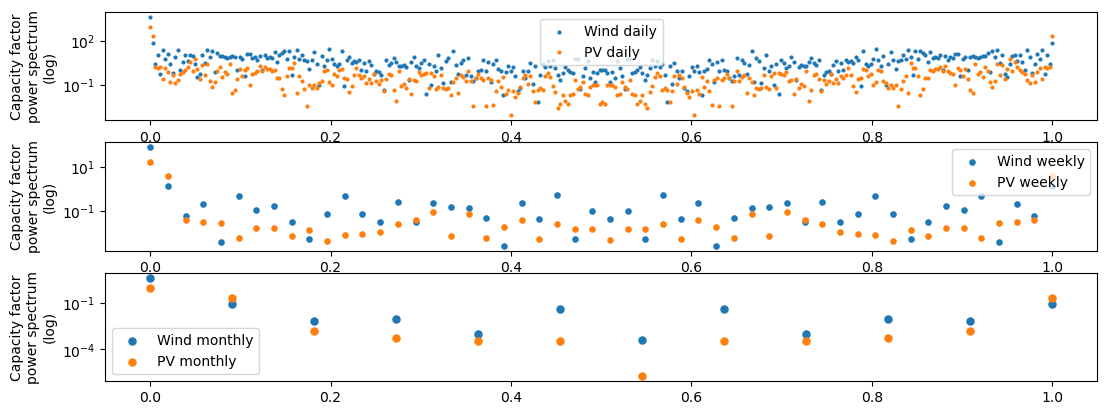

In [10]:
pf,pa=plt.subplots(3,1,figsize=(6.4*2,4.8))
d3=[[odm[:-1],pdm[:-1]],[owm[:-1],pwm[:-1]],[omm,pmm]]
l3=["daily","weekly","monthly"]
sz4=[4,14,26]
for a,da,labs,sz in zip(pa,d3,l3,sz4):
    a.scatter(np.linspace(0,1,len(da[0])),np.abs(np.fft.fft(da[0]))**2,label="Wind "+labs,s=sz)
    a.scatter(np.linspace(0,1,len(da[1])),np.abs(np.fft.fft(da[1]))**2,label="PV "+labs,s=sz)
    a.set_ylabel("Capacity factor\npower spectrum\n(log)")
    a.set_yscale("log")
    a.legend()
pf.savefig("a2_3.pdf")
#Fourier Power spectra: https://dsp.stackexchange.com/questions/4691/what-is-the-difference-between-psd-and-squared-magnitude-of-frequency-spectrum

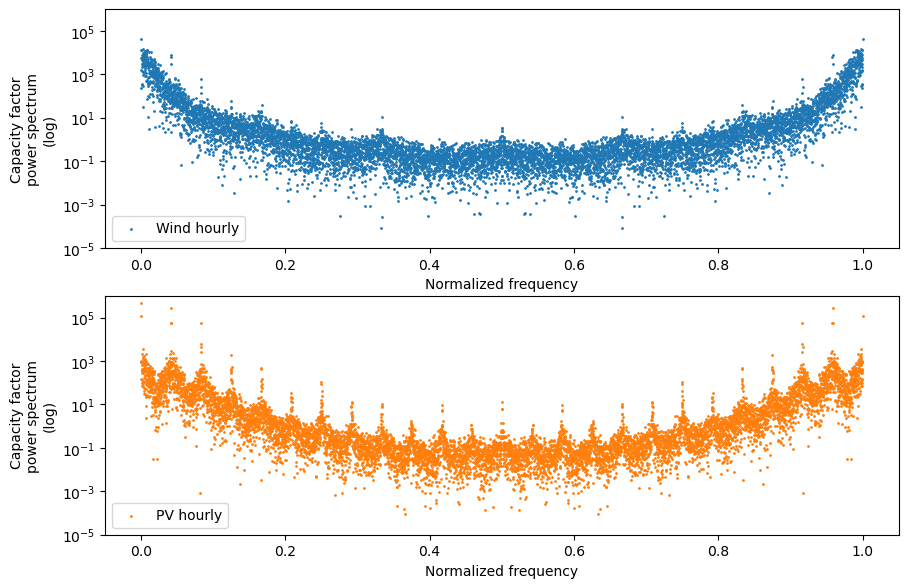

In [89]:
pf,pa=plt.subplots(2,1,figsize=(12.8*.8,.8*12.8*2/3))
#
#d3=[[odm[:-1],pdm[:-1]],[owm[:-1],pwm[:-1]],[omm,pmm]]
#l3=["daily","weekly","monthly"]
#sz4=[4,14,26]
#for a,da,labs,sz in zip(pa,d3,l3,sz4):
pa[0].scatter(np.linspace(0,1,365*24),np.abs(np.fft.fft(osw["FIN"][-365*24:]))**2,label="Wind hourly",s=1,c="C0")
pa[1].scatter(np.linspace(0,1,365*24),np.abs(np.fft.fft(pvo["FIN"][-365*24:]))**2,label="PV hourly",s=1,c="C1")
#pa.scatter(np.linspace(0,1,len(da[1])),np.abs(np.fft.fft(da[1]))**2,label="PV "+labs,s=sz)
for a in pa:
    a.set_xlabel("Normalized frequency")
    a.set_ylabel("Capacity factor\npower spectrum\n(log)")
    a.set_yscale("log")
    a.set_ylim([1e-5,1e6])
    a.legend()
#pf.savefig("a2_3.pdf")
#Fourier Power spectra: https://dsp.stackexchange.com/questions/4691/what-is-the-difference-between-psd-and-squared-magnitude-of-frequency-spectrum

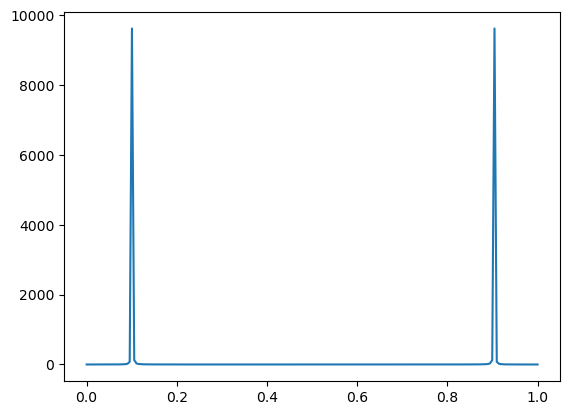

In [88]:
lss=np.linspace(0,1,200)
sinnn=np.sin(2*np.pi*4000*lss)
plt.plot(lss,np.abs(np.fft.fft(sinnn))**2)

# 4+5

On-shore wind
First  100 15.362000000000002 1540.931 0.00996929778166576
First 1000 216.15800000000002 1540.931 0.1402775335170751
PV
First  100 0.716 698.9649999999999 0.0010243717496584237
First 1000 27.310000000000002 698.9649999999999 0.03907205654074239


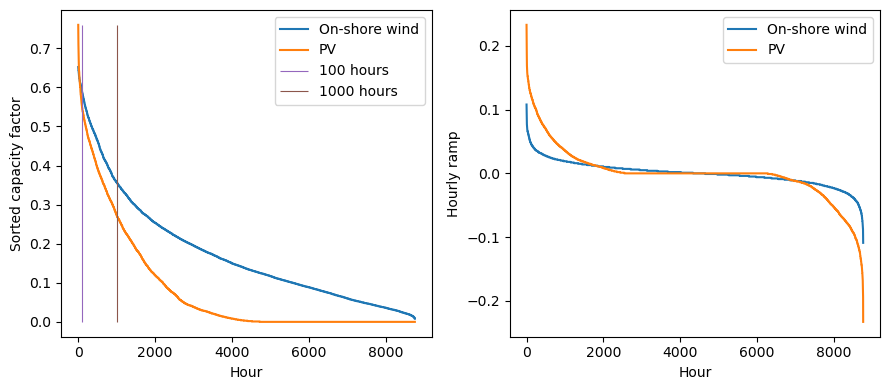

In [11]:
#4
pf,pa=plt.subplots(1,2,figsize=(9,4))
d4=[osw["FIN"][-365*24:], pvo["FIN"][-365*24:]]
l4=["On-shore wind","PV"]
for da,lab in zip(d4,l4):
    pa[0].plot(range(365*24),np.sort(da)[::-1],label=lab)
    print(lab)
    print("First  100",np.sum(da[:100]),np.sum(da),np.sum(da[:100])/np.sum(da))
    print("First 1000",np.sum(da[:1000]),np.sum(da),np.sum(da[:1000])/np.sum(da))
mv4=max(max(d4[0]),max(d4[1]))
pa[0].vlines([100],0,mv4,colors="C4",label="100 hours",linewidths=.8)
pa[0].vlines([1000],0,mv4,colors="C5",label="1000 hours",linewidths=.8)
pa[0].set_xlabel("Hour")
pa[0].set_ylabel("Sorted capacity factor")
pa[0].legend()

#5
for da,lab in zip(d4,l4):
    pa[1].plot(np.sort(np.diff(da))[::-1],label=lab)
pa[1].set_xlabel("Hour")
pa[1].set_ylabel("Hourly ramp")
pa[1].legend()
pf.tight_layout()
#pf.savefig("a2_45.pdf")

# 6
year-to-year?

In [12]:
oa6=[] #on-shore average, task 6
pa6=[] #pv average, task 6
yrs=range(1979,2018)
for yr in yrs:
    indc=[i for x,i in zip(ddat,range(len(ddat))) if x.year == yr]
    o6=[]
    p6=[]
    for i in indc:
        #print(ddat[i],osw["FIN"][i],pvo["FIN"][i])
        o6.append(osw["FIN"][i])
        p6.append(pvo["FIN"][i])
    oa6.append(np.mean(o6))
    pa6.append(np.mean(p6))
    print(yr,np.mean(o6),np.mean(p6))

1979 0.16751198630136985 0.08473310502283105
1980 0.1452926912568306 0.08765972222222221
1981 0.1759156392694064 0.08467762557077627
1982 0.1932 0.08216655251141552
1983 0.1852736301369863 0.07752134703196348
1984 0.1544104052823315 0.08162488615664845
1985 0.1611577625570776 0.08448824200913242
1986 0.18519406392694063 0.07859634703196347
1987 0.16812842465753425 0.08018059360730594
1988 0.1748950364298725 0.08356500455373406
1989 0.19410331050228308 0.07981289954337899
1990 0.19223550228310501 0.08339109589041095
1991 0.1762978310502283 0.07705650684931507
1992 0.20596914845173042 0.07689332877959926
1993 0.18066015981735162 0.08132054794520546
1994 0.1681997716894977 0.08841803652968037
1995 0.19555433789954338 0.07990981735159818
1996 0.15767634335154826 0.0873292349726776
1997 0.18517568493150685 0.09227853881278539
1998 0.19158527397260275 0.07967031963470318
1999 0.17295296803652968 0.08475639269406393
2000 0.18578142076502732 0.08091939890710384
2001 0.16875045662100455 0.08439

Wind av: 0.17623129055894324
var 0.00021387361118119615
PV av: 0.08330755749509117
var 1.916197085776647e-05


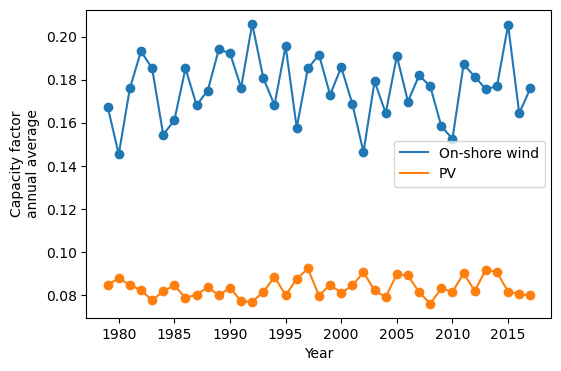

In [13]:
pf,pa=plt.subplots(1,1,figsize=(6,4))
pa.plot(yrs,oa6,label="On-shore wind")
pa.plot(yrs,pa6,label="PV")
pa.scatter(yrs,oa6)
pa.scatter(yrs,pa6)
pa.set_xlabel("Year")
pa.set_ylabel("Capacity factor\nannual average")
pa.legend()
print("Wind av:",np.mean(oa6))
print("var",np.std(oa6)**2)
print("PV av:",np.mean(pa6))
print("var",np.std(pa6)**2)
pf.savefig("a2_6.pdf")

# 7.1

In [14]:
hd=pd.read_csv("heat_demand.csv",sep=";")
ed=pd.read_csv("electricity_demand.csv",sep=";")

In [59]:
#Testing whether the dates are the same in the heat and electricity demand
a=0
for oo,pp in zip(hd["utc_time"],ed["utc_time"]):
    if(oo==pp):
        a+=1
print(a)
print(len(hd["utc_time"]),len(ed["utc_time"]))
hma=np.mean(hd["FIN"])
ema=np.mean(ed["FIN"])
hdn=hd["FIN"]/hma
edn=ed["FIN"]/ema

8760
8760 8760


In [60]:
dddat=[]
for oo in hd["utc_time"]:
    dddat.append(datetime.datetime.strptime(oo,"%Y-%m-%dT%H:%M:%SZ"))

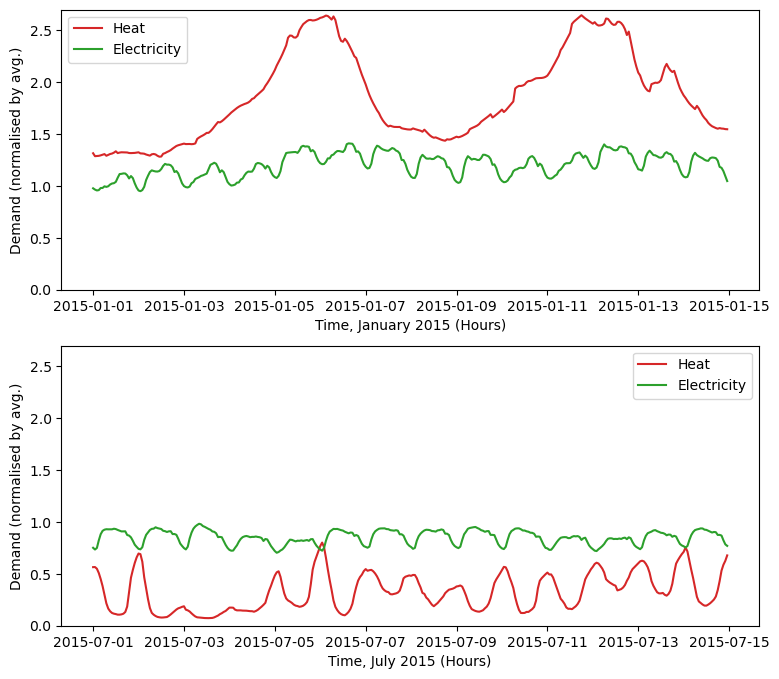

In [62]:
#dddat[:14*24] #jan
dddat[(181)*24:(14+181)*24] #jul

pf,pa=plt.subplots(2,1,figsize=(9,2*4))
sda=[0,181]
mnth=["January","July"]
for sd,a,mn in zip(sda,pa,mnth):
    a.plot(dddat[(sd)*24:(14+sd)*24],hdn[(sd)*24:(14+sd)*24],label="Heat",c="C3")
    a.plot(dddat[(sd)*24:(14+sd)*24],edn[(sd)*24:(14+sd)*24],label="Electricity",c="C2")
    a.set_xlabel("Time, "+mn+" 2015 (Hours)")
    a.set_ylabel("Demand (normalised by avg.)")
    a.set_ylim([0,max(hdn)*1.02])
    a.legend()
pf.savefig("a2_71.pdf")

# 7.2

In [63]:
hdm=[] #heat day mean
edm=[] #pv day mean
dddd=[]#demand date data day :P
for sd in range(0,365):
    hdm.append(np.mean(hdn[sd*24:(sd+1)*24]))
    edm.append(np.mean(edn[sd*24:(sd+1)*24]))
    dddd.append(dddat[sd*24])
hwm=[]
ewm=[]
dddw=[]
for sd in range(53):
    hwm.append(np.mean(hdn[7*24*sd:7*24*(sd+1)]))
    ewm.append(np.mean(edn[7*24*sd:7*24*(sd+1)]))
    dddw.append(dddat[7*24*sd])
hmm=[]
emm=[]
dddm=[]
for mn in range(1,13):
    hmmm=[]
    emmm=[]
    for dd,ooo,ppp in zip(dddat,hdn,edn):
        if(dd.month==mn):
            hmmm.append(ooo)
            emmm.append(ppp)
    hmm.append(np.mean(hmmm))
    emm.append(np.mean(emmm))
    dddm.append(datetime.date(2015, mn, 1))

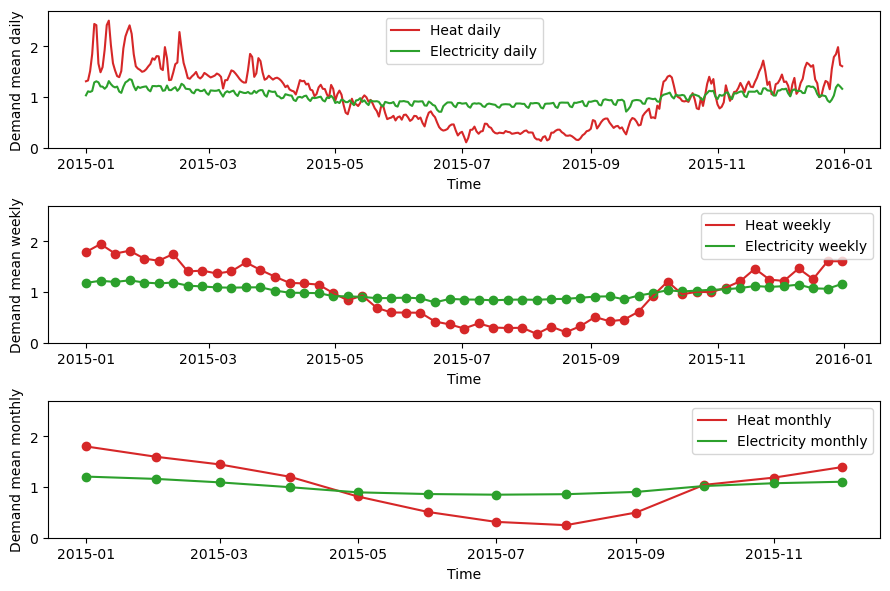

In [65]:
pf,pa=plt.subplots(3,1,figsize=(9,2*3))
d71=[[hdm,edm],[hwm,ewm],[hmm,emm]]
dt71=[dddd,dddw,dddm]
mnylbl=["daily","weekly","monthly"]
mnxlbl=["Days","Weeks","Months"]
for a,mny,mnx,dt,da in zip(pa,mnylbl,mnxlbl,dt71,d71):
    a.plot(dt,da[0],label="Heat "+mny,c="C3")
    a.plot(dt,da[1],label="Electricity "+mny,c="C2")
    if(len(dt)<100):
        a.scatter(dt,da[0],c="C3")
        a.scatter(dt,da[1],c="C2")
    a.set_ylabel("Demand mean "+mny)
    a.set_xlabel("Time")
    a.legend()
    a.set_ylim([0,max(hdn)*1.02])
pf.tight_layout()
pf.savefig("a2_72.pdf")

# 7.3

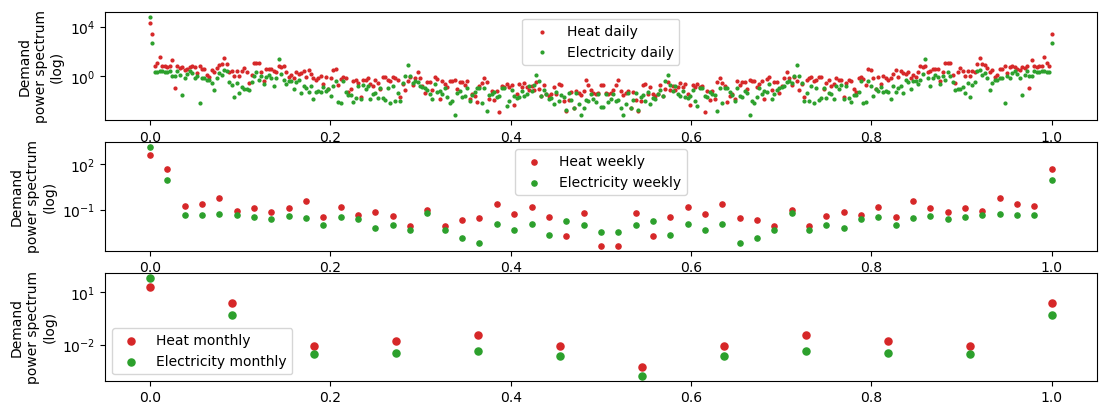

In [20]:
pf,pa=plt.subplots(3,1,figsize=(6.4*2,4.8))
d73=[[hdm,edm],[hwm,ewm],[hmm,emm]]
l73=["daily","weekly","monthly"]
sz4=[4,14,26]
for a,da,labs,sz in zip(pa,d73,l73,sz4):
    a.scatter(np.linspace(0,1,len(da[0])),np.abs(np.fft.fft(da[0]))**2,label="Heat "+labs,c="C3",s=sz)
    a.scatter(np.linspace(0,1,len(da[1])),np.abs(np.fft.fft(da[1]))**2,label="Electricity "+labs,c="C2",s=sz)
    a.set_ylabel("Demand\npower spectrum\n(log)")
    a.set_yscale("log")
    a.legend()
pf.savefig("a2_73.pdf")

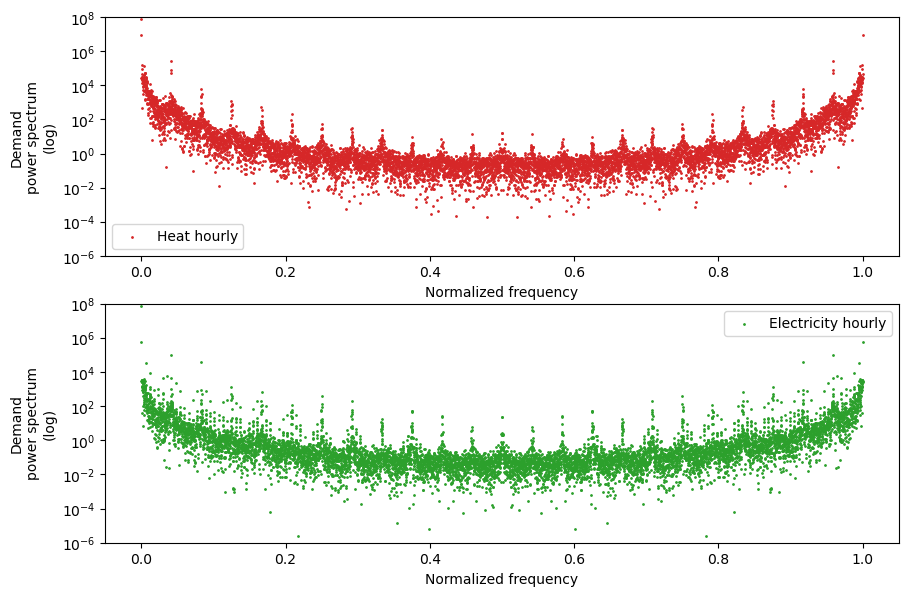

In [68]:
pf,pa=plt.subplots(2,1,figsize=(12.8*.8,.8*12.8*2/3))
pa[0].scatter(np.linspace(0,1,365*24),np.abs(np.fft.fft(hdn))**2,label="Heat hourly",s=1,c="C3")
pa[1].scatter(np.linspace(0,1,365*24),np.abs(np.fft.fft(edn))**2,label="Electricity hourly",s=1,c="C2")
for a in pa:
    a.set_xlabel("Normalized frequency")
    a.set_ylabel("Demand\npower spectrum\n(log)")
    a.set_yscale("log")
    a.set_ylim([1e-6,1e8])
    a.legend()
pf.savefig("a2_73.pdf")

# 7.4+7.5

Heat
First  100 152.53171441199152 8759.999999999982 0.017412296165752492 0.9825877038342475
First 1000 1765.6036153115383 8759.999999999982 0.20155292412232215 0.7984470758776778
Electricity
First  100 109.07540695758445 8760.0 0.012451530474610097 0.9875484695253899
First 1000 1197.3210817512104 8760.0 0.13668048878438474 0.8633195112156152


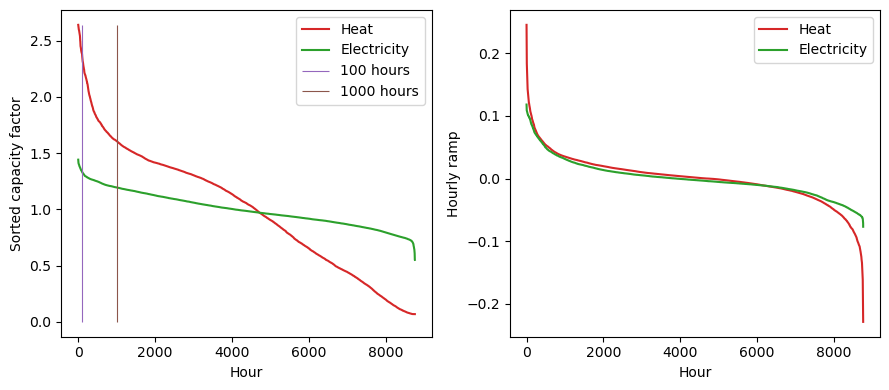

In [72]:
#4
pf,pa=plt.subplots(1,2,figsize=(9,4))
d74=[hdn, edn]
l74=["Heat","Electricity"]
cs=["C3","C2"]
for da,lab,cc in zip(d74,l74,cs):
    pa[0].plot(range(365*24),np.sort(da)[::-1],label=lab,c=cc)
    print(lab)
    print("First  100",np.sum(da[:100]),np.sum(da),np.sum(da[:100])/np.sum(da),1-np.sum(da[:100])/np.sum(da))
    print("First 1000",np.sum(da[:1000]),np.sum(da),np.sum(da[:1000])/np.sum(da),1-np.sum(da[:1000])/np.sum(da))
pa[0].vlines([100],0,max(hdn),colors="C4",label="100 hours",linewidths=.8)
pa[0].vlines([1000],0,max(hdn),colors="C5",label="1000 hours",linewidths=.8)
pa[0].set_xlabel("Hour")
pa[0].set_ylabel("Sorted capacity factor")
pa[0].legend()

#5
for da,lab,cc in zip(d74,l74,cs):
    pa[1].plot(np.sort(np.diff(da))[::-1],label=lab,c=cc)
pa[1].set_xlabel("Hour")
pa[1].set_ylabel("Hourly ramp")
#pa[1].set_ylim([-.1,.1])
pa[1].legend()
pf.tight_layout()
pf.savefig("a2_7475.pdf")